# Mathematische Modelle zur Beschreibung von Daten

Anhand des Datensatzes (https://datahub.io/core/global-temp#data) wollen wir zwei grundsätzlich verschiedene Vorhersagen miteinander vergleichen:

K-Neighbors-Regression und Lineare-Regression

---

In [1]:
import numpy as np
import pandas as pd
import scipy, scipy.stats
import seaborn as sns 
sns.set()
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor

In [2]:
data = pd.read_json("../data/temperature/monthly_json.json") 
data['Date'] = pd.to_datetime(data['Date'])

In [3]:
data.head()

,Date,Mean,Source
0,2016-12-06,0.7895,GCAG
1,2016-12-06,0.8100,GISTEMP
2,2016-11-06,0.7504,GCAG
3,2016-11-06,0.9300,GISTEMP
4,2016-10-06,0.7292,GCAG


Zunächst will ich die Daten etwas umformatieren, so dass das Datum zum index des Dataframes wird und die verschiedenen Quellen (Source) als Spalten dargestellt werden. Dazu nutze ich die Pivot-Funktion von pandas:

In [4]:
pivot_df = data.pivot(index='Date', columns='Source', values='Mean')

In [5]:
pivot_df.head()

Source,GCAG,GISTEMP
Date,,
1880-01-06 00:00:00,0.0009,-0.30
1880-02-06 00:00:00,-0.1229,-0.21
1880-03-06 00:00:00,-0.1357,-0.18
1880-04-06 00:00:00,-0.0499,-0.27
1880-05-06 00:00:00,-0.0738,-0.14


Wie ich aus der Beschreibung der Daten weiß, handelt es sich um einen zeitlichen Verlauf der Temperaturmittelwerte. Diesen will ich zunächst einmal visualisieren um ein gefühl dafür zu bekommen.

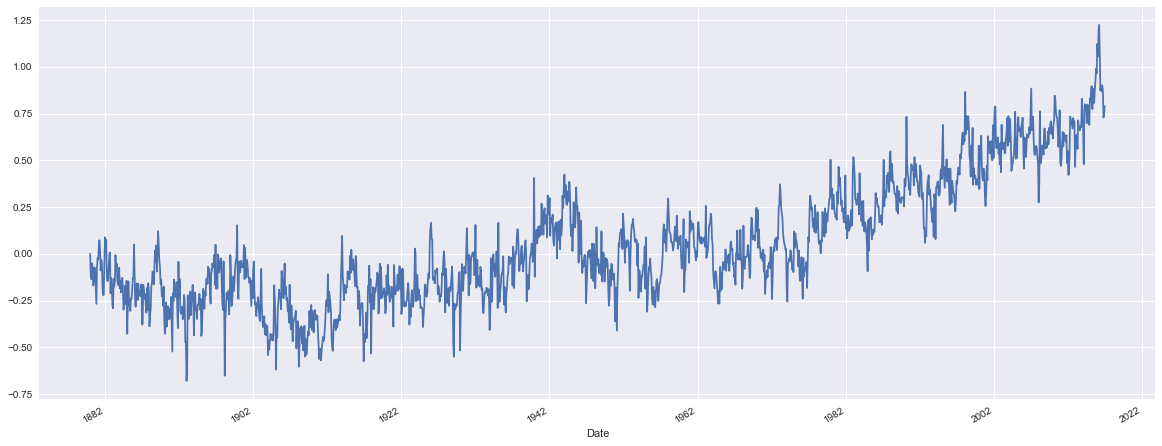

In [6]:
GCAG_data = pivot_df['GCAG'].plot(figsize=(20, 8))

In [39]:
GCAG_data = pivot_df['GCAG']

X = GCAG_data.index.values.astype(np.int64)
X = X / float(X.max()-X.min())
X = X.reshape(-1, 1)
X

array([[-0.65723484],
       [-0.65661494],
       [-0.65603503],
       ...,
       [ 0.34154535],
       [ 0.34216525],
       [ 0.34276516]])

In [40]:
y = pivot_df['GCAG'].values

---

Bei der Regression versuchen wir eine uns unbekannte Funktion 

$$ f(x) = y, \text{ mit } x,y \in \mathbb{R}$$

zu schätzen. Wir schauen uns dazu zunächst den nicht parametrischen Ansatz am Beispiel von k-Neighbors-Regression an. Hierbei wird die Funktion $f$ mit Hilfe des Mittelwertes der k nächsten Nachbaren geschätzt. Die so formulierte Schätzfunktion besitzt keine parametrische Form (Keine mathematische Formel mit Parametern). Somit zählt das Verfahren zu den nicht-parametrischen Regressionen. 
Der Unterschied zur Klassifizierung ist das die Zielvariable $y$ continuierlich ist und nicht diskret.

## Regression mit k-Neighbors-Regression

In [46]:
GCAG_df = pd.DataFrame(GCAG_data)

In [47]:
for i in range(0,5):
    k = i * 25 + 1
    knr = KNeighborsRegressor(n_neighbors=k, weights='uniform')
    knr.fit(X, y) 
    # Ich addiere eine Konstante auf alle Werte um die Linien meiner Funktionen übereinander darzustellen
    GCAG_df['KNN' + str(k)] = knr.predict(X) + i + 1

In [48]:
GCAG_df.head()

,GCAG,KNN1,KNN26,KNN51,KNN76,KNN101
Date,,,,,,
1880-01-06 00:00:00,0.0009,1.0009,1.922912,2.89899,3.862855,4.838465
1880-02-06 00:00:00,-0.1229,0.8771,1.922912,2.89899,3.862855,4.838465
1880-03-06 00:00:00,-0.1357,0.8643,1.922912,2.89899,3.862855,4.838465
1880-04-06 00:00:00,-0.0499,0.9501,1.922912,2.89899,3.862855,4.838465
1880-05-06 00:00:00,-0.0738,0.9262,1.922912,2.89899,3.862855,4.838465


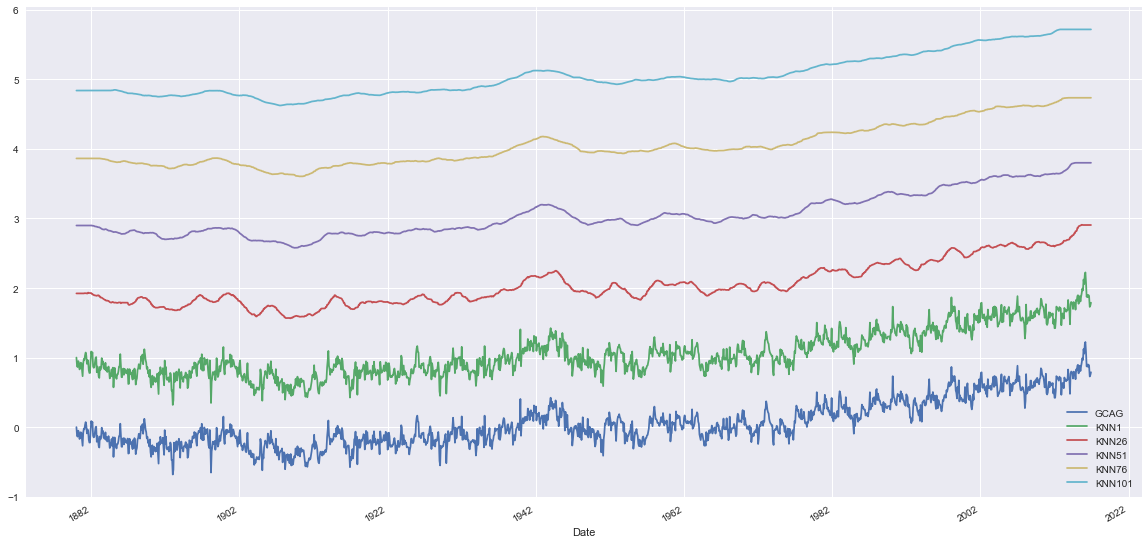

In [49]:
GCAG_df.plot(figsize=(20, 10));

---

Aufgabe:
- Implementiere Lineare Regression
- Teile die Daten in ein Train- und Test-set
- Berechne Trainings- und Test- Fehler für KNR und Lineare Regression:
    - RSE
    - RSS
    - R^2 Statistik